<a href="https://colab.research.google.com/github/hangnii/DL/blob/main/%5BDL%5D_52_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [3]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


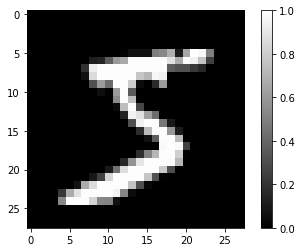

5


In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [5]:
train_X = train_X.reshape(-1, 28 * 28)
test_x = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 5ms/step - loss: 0.0517
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0174
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0119
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0098
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0077
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0067
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0063
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0060


ValueError: ignored

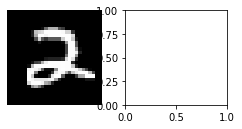

In [7]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28,28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)


In [12]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28,28,1)),
                             tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(7*7*64, activation='relu'),
                             tf.keras.layers.Reshape(target_shape=(7,7,64)),
                             tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
                             tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                200768    
                                                                 
 dense_6 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)      

In [13]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 10s 12ms/step - loss: 0.0771
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0333
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0242
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0219
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0209
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0203
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0200
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0197
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0195
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0193
Epoch 11/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0191
Epoch 12/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0190
Epoch 13/20


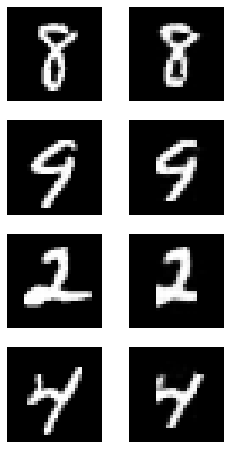

313/313 [==============================] - 2s 5ms/step - loss: 0.0180


0.0180192943662405

In [17]:
import random


plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28,28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

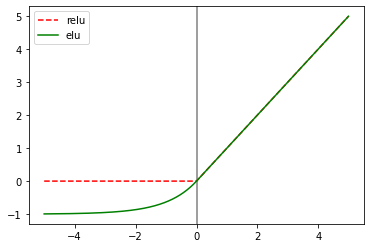

In [20]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--',label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [21]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28,28,1)),
                             tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(64, activation='elu'),
                             tf.keras.layers.Dense(7*7*64, activation='elu'),
                             tf.keras.layers.Reshape(target_shape=(7,7,64)),
                             tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
                             tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0543
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0186
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0129
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0114
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0107
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0102
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0099
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0097
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0094
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0092
Epoch 11/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0090
Epoch 12/20
235/235 [==============================] - 3s 11ms/step - loss: 0.0089
Epoch 13/20
2

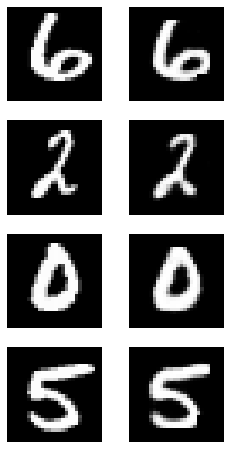

313/313 [==============================] - 2s 5ms/step - loss: 0.0080


0.007982497103512287

In [22]:
import random


plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28,28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

In [23]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[-0.9999632   1.7703658  -0.99999994 -0.9999999  18.534906    5.513332
 -1.         12.967274   23.367321    5.0133724   8.709256   16.850262
 -0.9999964   8.670467   -0.9999998   9.190909    6.4836206  25.421608
 20.283129   11.562628    0.49881572 23.60552    27.861269    9.73328
 -0.9982309   9.231581   -0.99999994 13.688004   -1.          6.688919
 -0.9999919  -0.99999994 -0.99999994 -0.999999    8.282176    6.186958
 12.215055   15.232023   26.52427    10.240717   -0.9999998  -0.99999994
 16.669006   24.19265    14.227317   14.456383   -0.99999994  4.9846663
 13.023012   -0.9389175  -0.9999906  11.016129   24.72864    -0.99999887
 16.389112   -0.99999976 -1.         11.405479   16.762169   -0.99999994
 -0.999997    9.905743   -0.99999964 -0.9999995 ]


In [25]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

CPU times: user 21.1 s, sys: 2.97 s, total: 24.1 s
Wall time: 12.4 s


In [26]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[8 7 1 ... 1 5 3]
(10, 64)
[-0.99144816  4.8543134  -0.99999917 -0.9999977  13.46121    19.169273
 -0.999999   12.018342    9.354042   15.386025   11.817401   15.630527
 -0.99954253 12.156632   -0.9999949  16.153028   11.393969   12.679755
 16.163118   20.817844   12.42332    15.278974   11.580004    4.4340615
 -0.97022545 19.514128   -0.9999995  21.064709   -0.99999774 12.875864
 -0.99990296 -0.99999404 -0.9999986  -0.9999627  15.057781    5.1766887
 11.903169   11.077229    8.773126   22.670658   -0.99999946 -0.99999934
 14.656966   11.992882   12.338806   15.258116   -0.99999565  2.0332282
 12.398147    3.6933024  -0.9999879  16.828146   16.497713   -0.99996084
 18.329086   -0.9999681  -0.99999875 13.2202015  18.767893   -0.9999987
 -0.9990016  10.617231   -0.99999034 -0.99998355]


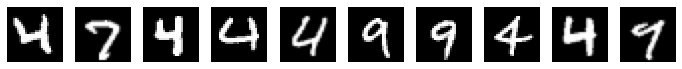

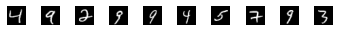

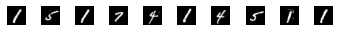

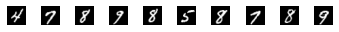

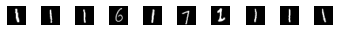

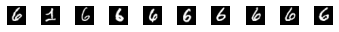

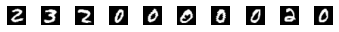

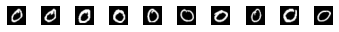

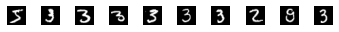

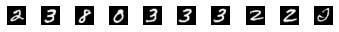

In [27]:
plt.figure(figsize=(12,12))

for i in range(10):
  images = train_X[kmeans.labels_ == i]
  for c in range(10):
    plt.subplot(10, 10, i*10+c+1)
    plt.imshow(images[c].reshape(28,28), cmap='gray')
    plt.axis('off')

  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


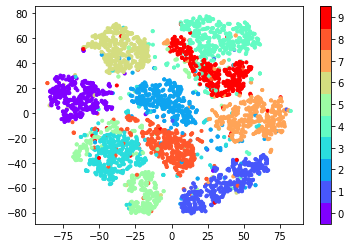

CPU times: user 1min 6s, sys: 491 ms, total: 1min 6s
Wall time: 36.3 s


In [29]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0],tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The defau

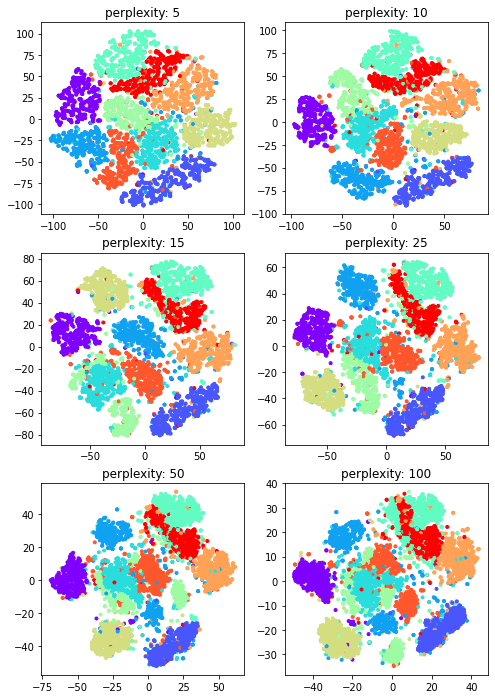

CPU times: user 8min 5s, sys: 4.46 s, total: 8min 9s
Wall time: 4min 28s


In [30]:
%%time

perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8,12))

for c in range(6):
  tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
  tsne_vector = tsne.fit_transform(latent_vector[:5000])

  plt.subplot(3, 2, c+1)
  plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
  plt.title('perplexity: {0}'.format(perplexities[c]))
plt.show()
                                     

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


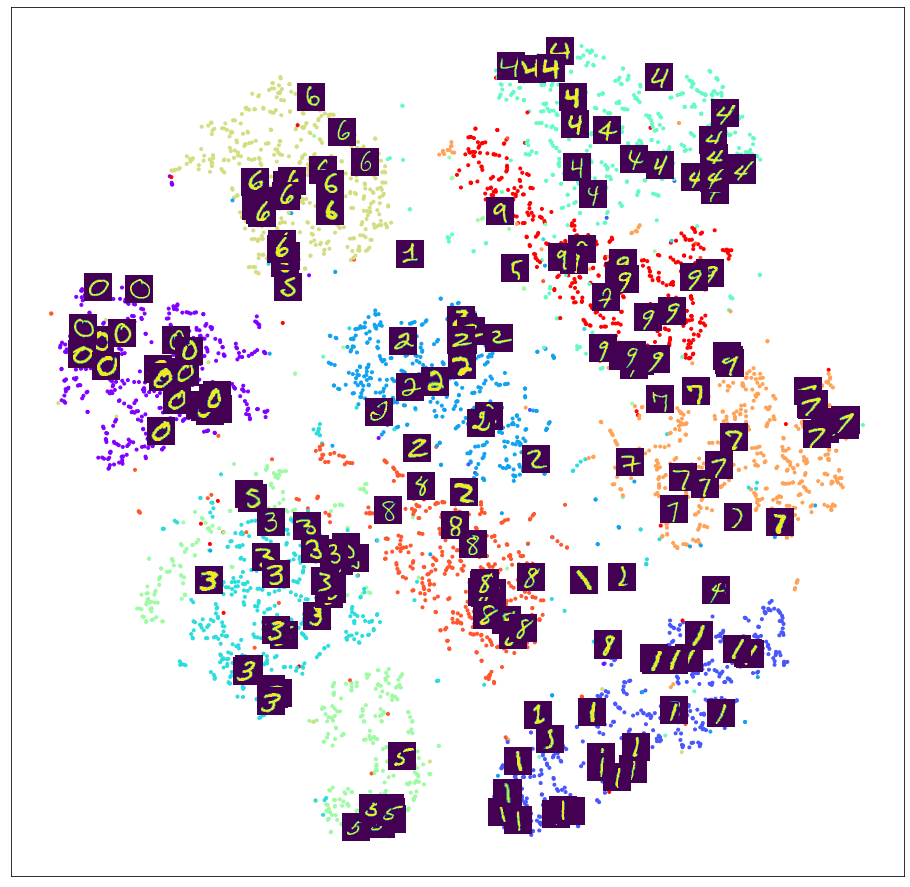

In [33]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16,16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
for i in range(200):
  imagebox = OffsetImage(train_X[i].reshape(28,28))
  ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
  ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()